# Bias–variance tradeoff !!!

![image](https://miro.medium.com/max/656/1*9hPX9pAO3jqLrzt0IE3JzA.png)

##### No model can achieve perfect bias and variance

### Further theory is availabe in the accompanying Markdown file with the same name

# Importing Libraries

In [139]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import numpy as np
import pandas as pd
import random
rcParams['figure.figsize'] = 6, 4
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

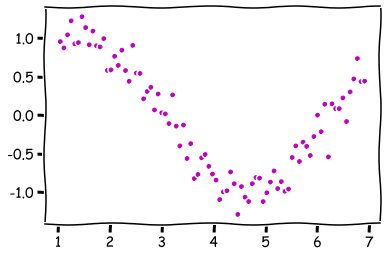

In [140]:
np.random.seed(42)                                                          # creating a random seed using numpy
x = np.array([i*np.pi/180 for i in range(60,400,4)])                        # creating datapoints for x using numpy
y = np.sin(x) + np.random.normal(0,0.18,len(x))                             # sin operated on x, and adding random noise
points = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])             # making a dataframe with x and y
plt.xkcd()                                                                  # for funny, cool graphs 😊😊😊
plt.plot(points['x'],points['y'], '.', color='m')                           # plotting the points

In [141]:
def curve_fit( degree ):                                                    # a function to fit a polynomial in the above graph
    p = np.polyfit( points.x, points.y, deg = degree )                     # numpy polyfit function to fit points (x, y)
    points['fit'] = np.polyval( p, points.x )                              # making a new column in the dataframe
    sn.regplot( points.x, points.y, fit_reg = False )                      # plotting the points using seaborn
    plt.plot( points.x, points.fit, label='fit', color="m" )               
    plt.title("degree: "+str(i))                                           # obvious !!!
    plt.show()

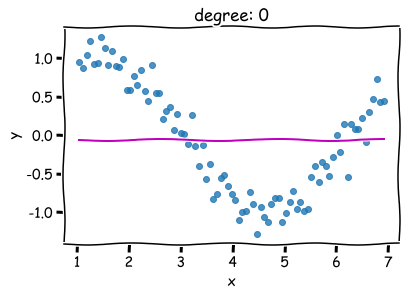

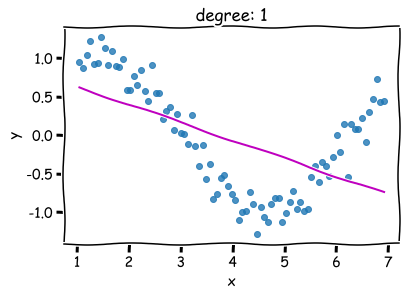

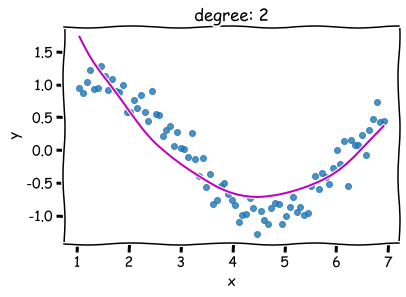

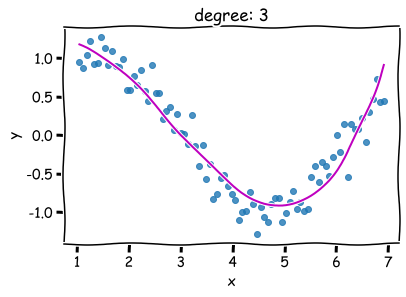

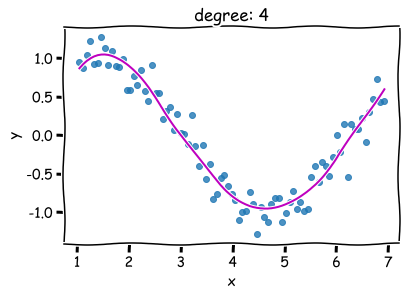

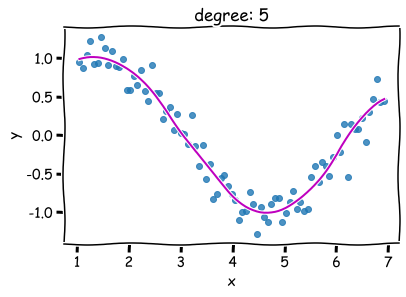

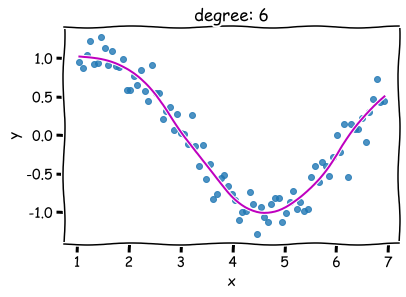

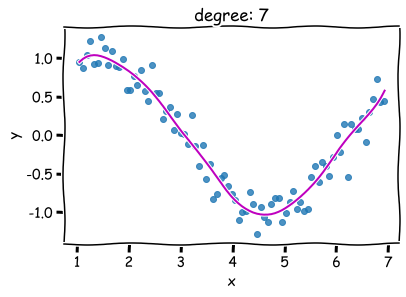

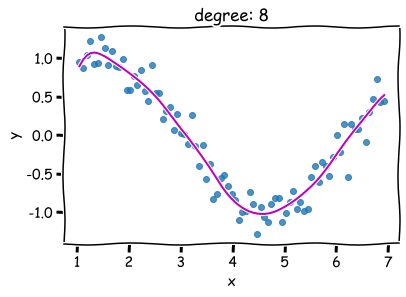

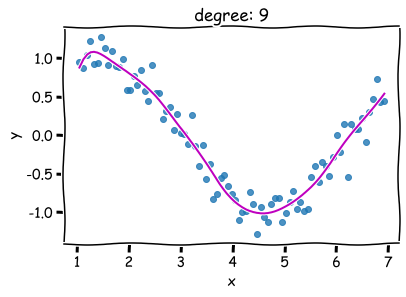

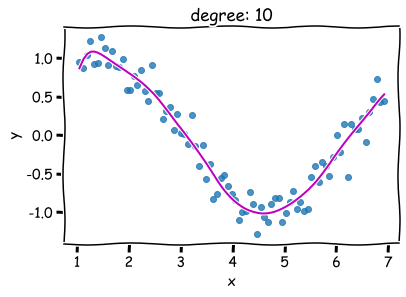

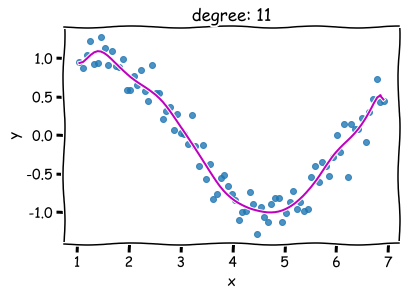

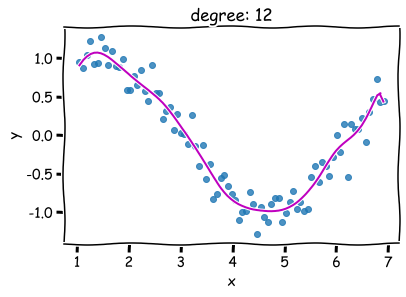

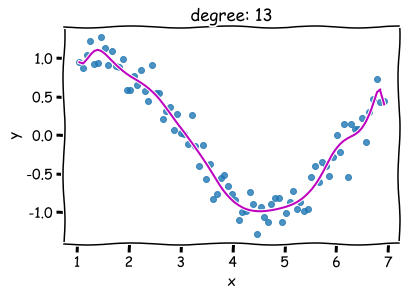

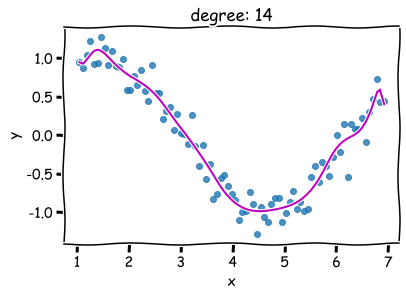

In [142]:
for i in range(15):                                                        # calling the function to plot graphs
    curve_fit(i)

# As you can see degree 1 model does't fit the data. It indicates High Bias. As the model complexity increases, it captures the variance in the data perfectly. At high degree, Model is not able to generalize on the test data, i.e. unseen data. A perfect model lies somewhere between High bias and High variance condition. If you decrease Bias, Variance will increase and vice versa. No model is perfect therefore there is a tradeoff between Bias and Variance, kind off like the uncertainity principle!!!

In [143]:
def rmse( y_true, y_pred ):                                                          # funtion to calculate rmse using sklearn
    return np.sqrt( metrics.mean_squared_error( y_true, y_pred ) )

In [144]:
# splitting in train and test set
x_train, x_test, y_train, y_test = train_test_split( points.x,
                                                  points.y,
                                                  test_size = 0.20,
                                                  random_state = 42 )

In [145]:
# creating columns in dataframe
rmse_data = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )
# filling the values in the coloumn
for i in range( 1, 15 ):
    p = np.polyfit( x_train, y_train, deg = i )
    rmse_data.loc[i-1] = [ i,
                       rmse( y_train, np.polyval( p, x_train ) ),
                       rmse( y_test, np.polyval( p, x_test ) ) ]

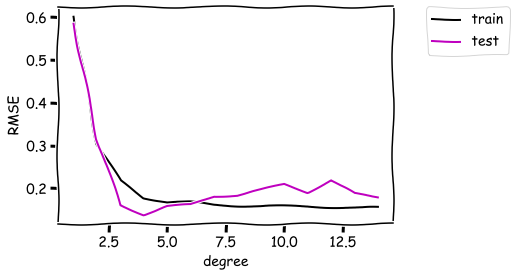

In [146]:
# finally!!! Huh!! 😊😊😊
# Plotting the errors 

plt.plot( rmse_data.degree,
       rmse_data.rmse_train,
       label='train',
       color = 'k' )

plt.plot( rmse_data.degree,
       rmse_data.rmse_test,
       label='test',
       color = 'm' )

plt.xlabel("degree")
plt.ylabel("RMSE")
plt.legend(bbox_to_anchor=(1.1, 1),
         loc=2,
         borderaxespad=0.)

# Train error decreases as well as the test error but test error increases when model starts overfitting. Model is not able to capture the underlying variance in the test data. It has high bias when degree is high.

# Now you have understood how bias and variance are related to under and overfitting 😊😊. Actually, they are so similar that graphs can't be good measure to differentiate between them. More theory is available with the markdown.